In [ ]:
import numpy as np
import subprocess
import os
# import matlab.engine
import pdb
import glob
import nibabel as nib
from zipfile import ZipFile
import shutil
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import sys
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
os.environ['FSLDIR'] = 'fsl'
# os.environ['FSLOUTPUTTYPE'] = 'NIFTI'
os.environ['PATH'] += ":" + os.path.join(os.environ['FSLDIR'], 'bin')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_folder = '/content/drive/My Drive/Colab Notebooks/tumourDataSet'

In [ ]:
try:
  os.mkdir(path_to_folder)
  print(f'Folder {path_to_folder} created')
except FileExistsError:
  print(f'Folder {path_to_folder} already exists')

Folder /content/drive/My Drive/Colab Notebooks/tumourDataSet already exists


In [ ]:
zip_path = '/content/drive/MyDrive/dataset.zip'
extractTo = '/content/drive/MyDrive/ColabNotebooks/tumourDataSet'

In [ ]:
shutil.unpack_archive(zip_path, extractTo)

In [ ]:
files = os.listdir(extractTo)
for file in files:
    print(file)

In [ ]:
readme_path = extractTo + '/README.txt'
with open(readme_path) as f:
    print(f.read())

 iterate through all the files in the zip_files directory, which is located in the root of your Google Drive. If a file ends with the '.zip' extension, it will extract the contents of the zip file to a folder with the same name as the zip file but without the '.zip' extension using os.path.splitext(filename)[0].


In [ ]:
path_to_mat_folder = extractTo + '/data'

In [ ]:

if not os.path.exists(path_to_mat_folder):
    os.mkdir(path_to_mat_folder)

for filename in os.listdir(extractTo):
    if filename.endswith('.zip'):
        zip_path = os.path.join(extractTo, filename)
        extract_path = os.path.join(extractTo, os.path.splitext(filename)[0])
        if not os.path.exists(extract_path):
            os.makedirs(extract_path)
        with ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
            for root, dirs, files in os.walk(extract_path):
                for file in files:
                    if file.endswith('.mat'):
                        mat_file_path = os.path.join(root, file)
                        shutil.move(mat_file_path, path_to_mat_folder)

cjdata
('cjdata', <HDF5 group "/cjdata" (5 members)>)
PID <HDF5 dataset "PID": shape (6, 1), type "<u2">
image <HDF5 dataset "image": shape (512, 512), type "<i2">
label <HDF5 dataset "label": shape (1, 1), type "<f8">
tumorBorder <HDF5 dataset "tumorBorder": shape (1, 38), type "<f8">
tumorMask <HDF5 dataset "tumorMask": shape (512, 512), type "|u1">
IMAGE TYPE IS : <class 'numpy.ndarray'>
Image FINAL :  [[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -0.99215686 -1.         ... -1.         -1.
  -1.        ]
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 ...
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]]
Image shape:  (512, 512)
Label 1.0
Coords:  [267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
 250.8892922  305.71324864 253.676951

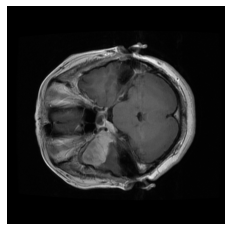

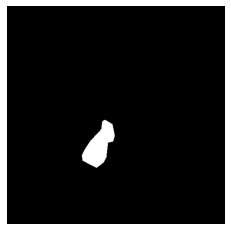

In [ ]:
arrays = {}
img = None

def print_keys(f):
    for key in f.keys():
        print(key)

def print_items(f):
    for item in f.items():
        print(item)

def key_val_print(f):
    data = {}
    cjdata = f['cjdata']
    for key, val in cjdata.items():
        print(key, val)

def display_image(img):
    plt.figure(3)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

with h5py.File(path_to_mat_folder + '/1.mat', 'r') as f:
    print_keys(f)
    print_items(f)
    key_val_print(f)
    
    image_data = f['cjdata']
    img = f['cjdata']['image']
    label = f['cjdata']['label'][0][0]
    tumorBorder = f['cjdata']['tumorBorder'][0]
    mask = f['cjdata']['tumorMask']
    fig = plt.figure(2)
    img = np.array(img, dtype=np.float32)
    intensity = np.mean(img, axis=-1)
    
    img = img/127.5 - 1
    print("IMAGE TYPE IS :" , type(img))
    print("Image FINAL : ", img)
    mask = np.array(mask, dtype=np.float32)
    mask = mask/127.5 - 1
    display_image(img)
    print("Image shape: ", img.shape)
    print("Label", label)
    print("Coords: ", tumorBorder)
    print("Mask shape: ", mask.shape)
    display_image(mask)

In [ ]:
if not os.path.isdir('/content/drive/MyDrive/ColabNotebooks/new_dataset'):
  os.mkdir('/content/drive/MyDrive/ColabNotebooks/new_dataset')
if not os.path.isdir('/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images'):
  os.mkdir('/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images') 

In [ ]:
labels = []
border = []

In [ ]:
filename = None

for filename in range(1, 3065):
  with h5py.File('/content/drive/MyDrive/ColabNotebooks/tumourDataSet/data/{}.mat'.format(filename), 'r') as f:
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      tumorBorder = f['cjdata']['tumorBorder'][0]
     
      labels.append(int(label))
      
      border.append(tumorBorder)#not needed
      img = np.array(img, dtype=np.float32)
      
      nii_img = nib.Nifti1Image(img, np.eye(4))
      nib.save(nii_img, "/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images/{}.nii".format(filename))
      
print("{} files successfully saved".format(filename))

3064 files successfully saved


In [ ]:
file_count2 = len([f for f in os.listdir('/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images') if os.path.isfile(os.path.join('/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images', f))])
print(file_count2)

3064


In [ ]:
direc="/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images/"
curr_direc = "/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images/"
files = glob.glob(direc+'*.nii')
print(files[3063])

/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images/HU_0_65.nii


In [ ]:
nii_img = nib.load("/content/drive/MyDrive/ColabNotebooks/new_dataset/try2/1.nii")
imgnew = nii_img.get_fdata()
channel1 = imgnew[:,:,1]
plt.imshow(channel1, cmap='gray')
plt.axis('off')
plt.show()

nii_img = nib.load("/content/drive/MyDrive/ColabNotebooks/new_dataset/try2/1new.nii")
imgnew = nii_img.get_fdata()
# channel1 = imgnew[:,:,0]//image
# channel2 = imgnew[:,:,1]//mask
# print(len(channel1[1,:]))
plt.imshow(imgnew, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
data_dir = '/content/drive/MyDrive/ColabNotebooks/tumourDataSet/data/'  # replace with the path to the directory where the dataset is stored

# Count number of files in data_dir to see if we have all 3064 files.
count = 0
for path in os.listdir(data_dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(data_dir, path)):
        count += 1
print('File count:', count)


# create numpy arrays to store the images and masks
num_images = count
images = np.empty((num_images,), dtype = object)
masks = np.empty((num_images,), dtype = object)
labels = np.empty((num_images,),dtype = np.int64)

for filename in range(1, 3065):
  path = data_dir + '{}.mat'.format(filename)
  with h5py.File(path, 'r') as f:
      print("@@@AT FILE ",filename)
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      tumorMask = f['cjdata']['tumorMask']

      tumorMask = np.array(tumorMask).astype(bool).flatten()
      label = np.array(label)

      masks[filename-1] = tumorMask
      labels[filename-1] = label

      img = np.array(img, dtype=np.float32)
      nii_img = nib.Nifti1Image(img, np.eye(4))

      savepath = "/content/drive/MyDrive/ColabNotebooks/numpydata/preprocess_conversion/{}.nii".format(filename)
      nib.save(nii_img, savepath)

      img = nib.load(savepath)
      newimg = img.get_fdata().flatten()
      
      images[filename-1] = newimg
      
      
      
print("{} files successfully saved".format(filename))
save2 = "/content/drive/MyDrive/ColabNotebooks/"
np.save(save2+'images.npy', images)
np.save(save2+'masks.npy', masks)
np.save(save2+'labels.npy', labels)


In [ ]:
direc="/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images/new/"
curr_direc = "/content/drive/MyDrive/ColabNotebooks/new_dataset/bt_images/"
files = glob.glob(direc+'*.nii')
# filename = os.path.splitext(files[0])[0]
# f = os.path.basename(filename)
# print(filename)
# print(f)
print(len(files)/2)

3064.0


In [ ]:
import numpy as np

images = np.load("/content/drive/MyDrive/ColabNotebooks/images.npy", allow_pickle=True)
masks = np.load("/content/drive/MyDrive/ColabNotebooks/masks.npy", allow_pickle=True)
labels = np.load("/content/drive/MyDrive/ColabNotebooks/labels.npy")
print(f"images:{images.shape}, \
masks:{masks.shape}, \
labels:{labels.shape}")

images:(3064,), masks:(3064,), labels:(3064,)


In [ ]:
unique_labels, counts = np.unique(labels, return_counts=True)


In [ ]:
import cv2
data = np.column_stack((images, masks, labels))

def show_data(data, label, samples_num=5):
    pred_idx = np.where(data[:,2] == label)
    pred_data = data[pred_idx]
    
    #random selection
    idx = np.random.choice(pred_data.shape[0], samples_num, replace=False)
    display_here = pred_data[idx]
    
    list1 = [] #images are stored
    list2 = [] #masks are stored
    list3 = [] #labels are stored
    for display in display_here:
        #images
        list1.append(cv2.resize(display[0], (512, 512)))
        #masks
        list2.append(cv2.resize(display[1].astype("uint8"), 
                                (512, 512)))
        #labels
        list3.append(display[2])

    return np.hstack(list1), np.hstack(list2), list3

In [ ]:
img_type1, mask_type1, label_type1 = show_data(data, label=1, samples_num=5)
img_type2, mask_type2, label_type2  = show_data(data, label=2, samples_num=5)
img_type3, mask_type3, label_type3 = show_data(data, label=3, samples_num=5)


In [ ]:
from sklearn.model_selection import train_test_split
data = np.column_stack((images, masks, labels))
set_training, set_validation = train_test_split(data, test_size=0.08, random_state=42)
set_training, test_info = train_test_split(set_training, test_size=0.12, random_state=42)


In [ ]:
import albumentations as A

def get_modifications():
    return A.Compose([
        A.VerticalFlip(p=0.5),
        A.Rotate(limit=30, p=0.5),
        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=0.5, border_mode=0),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(p=0.5, distort_limit=2, shift_limit=0.5),
        A.Resize(156, 156, p=1.),
        A.RandomCrop(128, 128, p=1.)
    ])

In [ ]:
from torch.utils.data import Dataset
class BT_MRI_Dataset(Dataset):
    def __init__(self, info, modifications, num=3):
        self.info = info
        self.modifications = modifications
        self.num = num
        
    def __len__(self):
        return len(self.info)
    
    def __getitem__(self, x):
        scan = self.info[x][0].astype("float32")
        average, standarddev = scan.mean(), scan.std()
        scan = (scan - average) / standarddev
        scanconv = np.stack([scan]*3).transpose(1,2,0)
        name = self.info[x][2] - 1
        seg_map = np.expand_dims(self.info[x][1], -1)
        
        ground_seg_map = np.zeros((seg_map.shape[0], seg_map.shape[1], 
                                self.num))
        ground_seg_map[:,:, name : name + 1] = seg_map.astype("uint8")
        
        ground_seg_map = np.clip(ground_seg_map, 0, 1).astype("float32")
        
        
        newscan = self.modifications(scan=scanconv, 
                                    seg_map=ground_seg_map)
        scan = newscan['scan']
        seg_map = newscan['seg_map']
        
        return scan, seg_map

In [ ]:
set_training = BT_MRI_Dataset(info=set_training, modifications=get_modifications())
inputTraining = DataLoader(set_training, batch_size=16, num_workers=4, 
                              shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


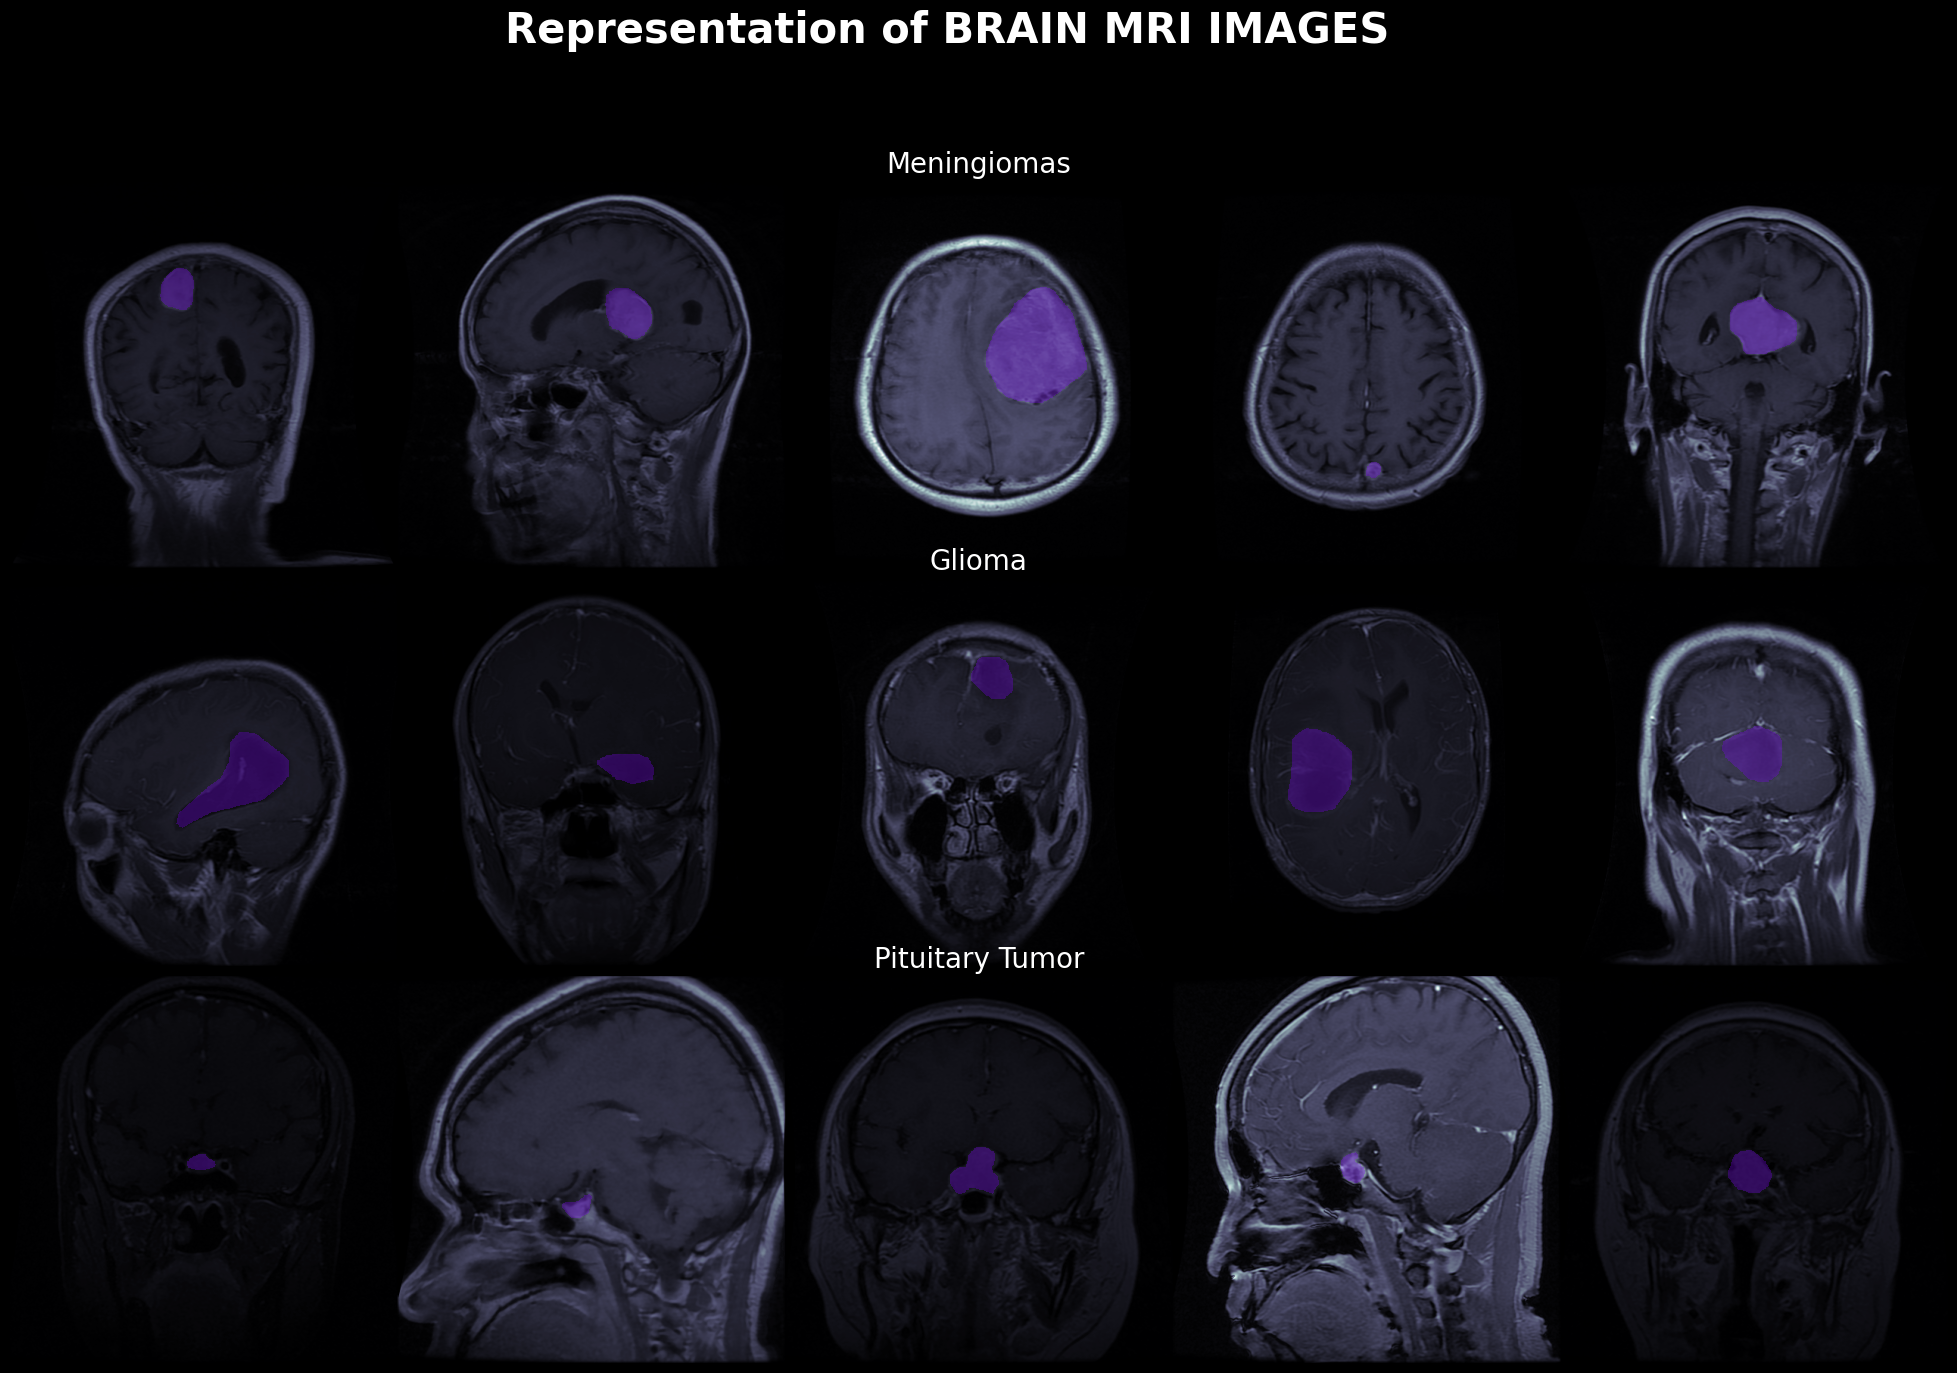

In [ ]:
#Showing how the data looks like
from mpl_toolkits.axes_grid1 import ImageGrid


def visualize_images(img_type1, img_type2, img_type3,mask_type1,mask_type2,mask_type3,label_type1,label_type2,label_type3):
  fig = plt.figure(figsize=(25., 25.))
  grid = ImageGrid(fig, 111,
                     nrows_ncols=(3, 1),
                     axes_pad=0.1)
  i=0
  while i!=3:
        grid[i].imshow(img_type1, cmap="bone")
        grid[i].imshow(np.ma.masked_where(mask_type1== False,
                                          mask_type1), cmap='rainbow', alpha=0.3)
        grid[i].set_title("Meningiomas", fontsize=20)
        grid[i].axis("off")
        i++
        grid[i].imshow(img_type2, cmap="bone")
        grid[i].imshow(np.ma.masked_where(mask_type2 == False,
                                  mask_type2), cmap='rainbow', alpha=0.3)
        grid[i].set_title("Glioma", fontsize=20)
        grid[i].axis("off")
        i++
        grid[i].imshow(img_type3, cmap="bone")
        grid[i].imshow(np.ma.masked_where(mask_type3 == False,
                                  mask_type3), cmap='rainbow', alpha=0.3)

        grid[i].set_title("Pituitary Tumor", fontsize=20)
        grid[i].axis("off") 
        plt.suptitle("Representation of BRAIN MRI IMAGES",
                    y=.80, fontsize=30, weight="bold")

        plt.show()
        i++
        
visualize_images(img_type1, img_type2, img_type3,mask_type1,mask_type2,mask_type3,label_type1,label_type2,label_type3)

torch.Size([16, 128, 128, 3]) torch.Size([16, 128, 128, 3])


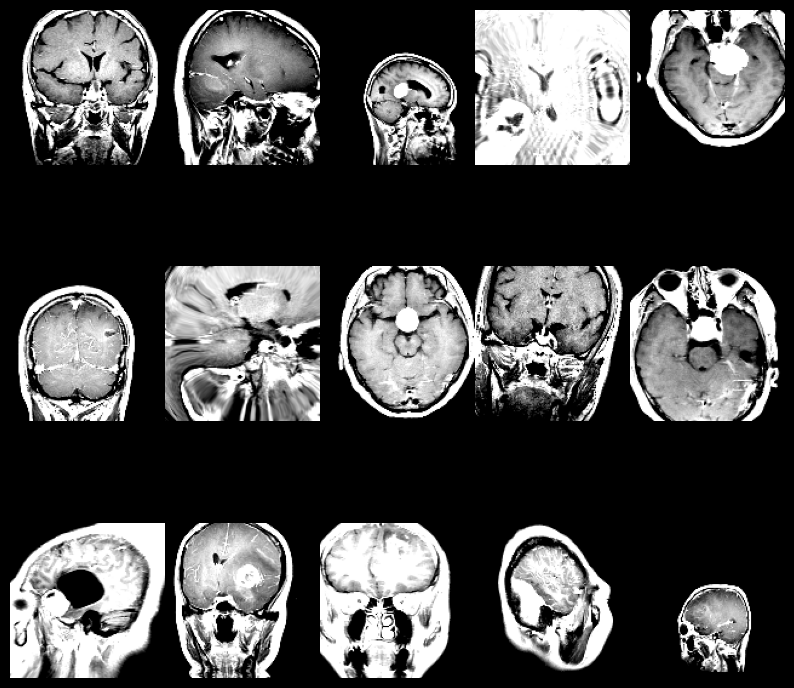

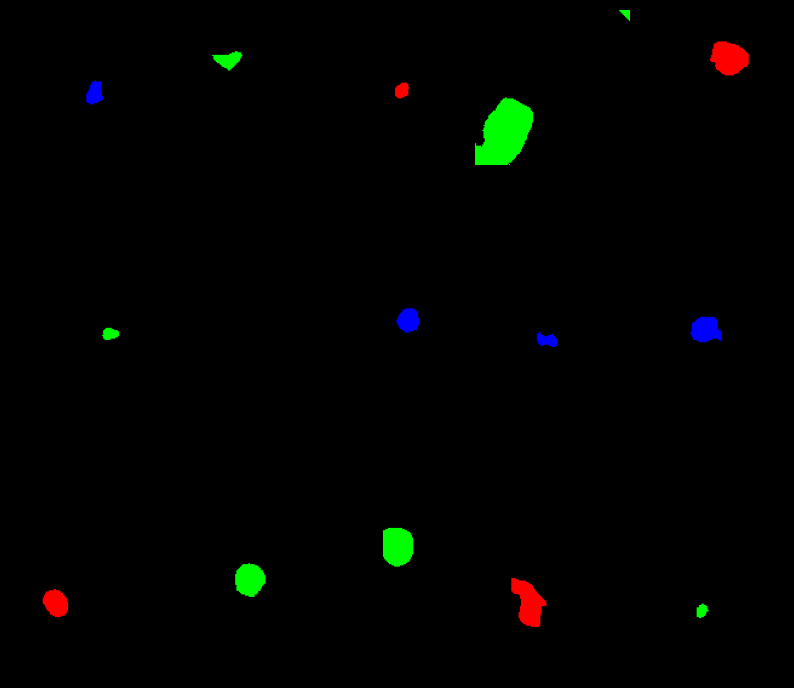

In [ ]:
from torch.utils.data import DataLoader
def new_display(inputs, totalR=3, totalC=5, flag_img=True):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0., hspace=0.)
    temp = 0
    
    if len(inputs) > 15:
        inputs = inputs[:15]
        
    for idx in range(len(inputs)):
        if flag_img is False:
          show = inputs[idx].numpy().astype(np.float32)
          show = show[0,:,:]
        else:           
            show = inputs[idx].numpy()
      
        plt.subplot(totalR, totalC, temp+1)
        plt.imshow(show); 
        plt.axis('off')
        temp = temp + 1
    return plt.show()


def display_data(inputTraining):
    dispImg, dispMask = next(iter(inputTraining))
    print(dispImg.shape)
    print(dispMask.shape)
    new_display(dispImg)
    new_display(dispMask)

display_data(inputTraining)



In [12]:
import numpy as np

images = np.load("/content/drive/MyDrive/ColabNotebooks/images.npy", allow_pickle=True)
masks = np.load("/content/drive/MyDrive/ColabNotebooks/masks.npy", allow_pickle=True)
labels = np.load("/content/drive/MyDrive/ColabNotebooks/labels.npy")
print(f"images:{images.shape}, \
masks:{masks.shape}, \
labels:{labels.shape}")

images:(3064,), masks:(3064,), labels:(3064,)


<ipython-input-15-6ad1d04a90a4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


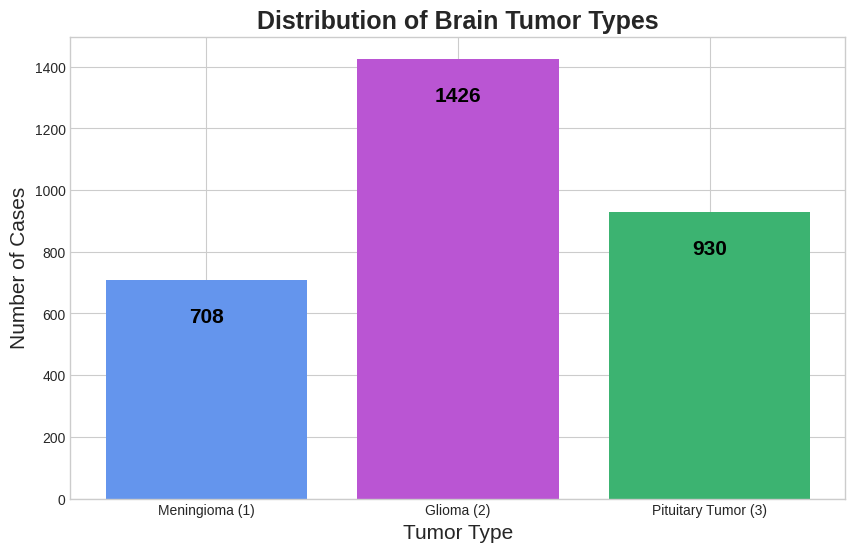

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

unique_labels, label_counts = np.unique(labels, return_counts=True)

fig, ax = plt.subplots(figsize=(10, 6))
bar_labels = ['Meningioma (1)', 'Glioma (2)', 'Pituitary Tumor (3)']
bar_colors = ["cornflowerblue", "mediumorchid", "mediumseagreen"]

# Create the bar plot
ax.bar(unique_labels, label_counts, color=bar_colors, tick_label=bar_labels)

# Annotate the bars with counts
for label, count in zip(unique_labels, label_counts):
    ax.annotate(
        int(count),
        xy=(label, count - 150),
        rotation=0,
        color="black",
        ha="center",
        verticalalignment='bottom',
        fontsize=15,
        fontweight="bold"
    )

# Set the plot title and axis labels
ax.set_title("Distribution of Brain Tumor Types", fontsize=18, fontweight="bold")
ax.set_xlabel("Tumor Type", fontsize=15)
ax.set_ylabel("Number of Cases", fontsize=15)

# Display the plot
plt.show()
